# Capstone 1 - Part 1

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1LfquyGkEO45x35q8yvYzke8lswCfBu89/view?usp=sharing)
 
### Context & Problem statement:

This is a fictional data set that contains atmost 30 features of categorical and discreet data. These data are kind of both numerical and text values which help in analysing the employee data from hiring to firing and on boarding to attrition.  Dive into current available HR metrics to reduce the attrition rate and improve employee performance. Employee attrition has long been a significant worry for organizations due to the substantial investments of time, money, and effort in training new employees. When an employee departs, it results in overall losses for the company, including the cost of replacing and retraining, as well as disruptions in workflow. Moreover, attrition can erode trust among remaining employees, creating additional management challenges.

The HR Attrition dataset, albeit fictional, serves the purpose of identifying key factors that could play a pivotal role in determining which employees are more likely to leave the company and who is likely to stay. In this capstone, we delve into a thorough analysis of these influential factors and employ predictive modeling techniques to gain a deeper understanding, ultimately enabling us to make accurate predictions regarding employee attrition.

### Business use case:

- Brief overview of attrition within the organization
- Explore the main factors that lead to employee attrition
- Propose relevant contributors to Performance Ratings and calculate their correlations

### Goals/ Metrics:

- Identify top reasons for attrition and recommend further action steps to improve
- Point out key factors that drive employee performance

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features, and target variable (attrition)
- Understanding the context and significance of each feature in relation to employee attrition

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables (e.g., employee tenure, performance scores) and do Exploratory Data Analysis (EDA)
- Analyzing factors contributing to employee attrition (e.g., age, job role, salary, work environment)
- Visualizing attrition rates across different demographic and employment-related variables
- Identifying correlations and patterns in the data to understand attrition drivers
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

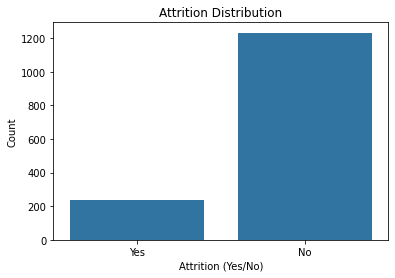


Visualizing selected features vs. Attrition


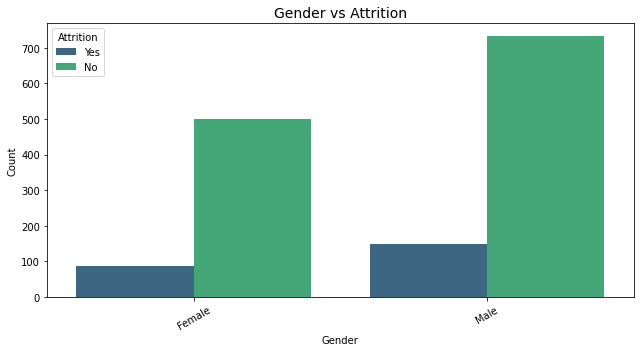

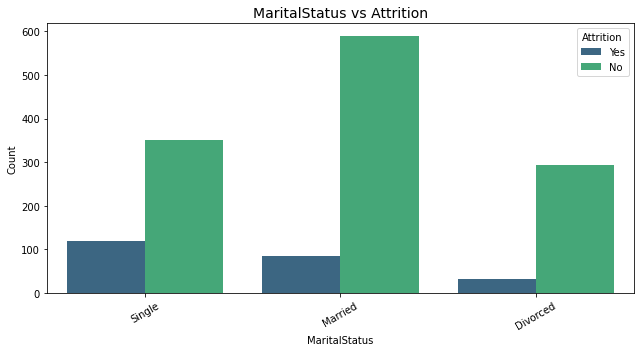

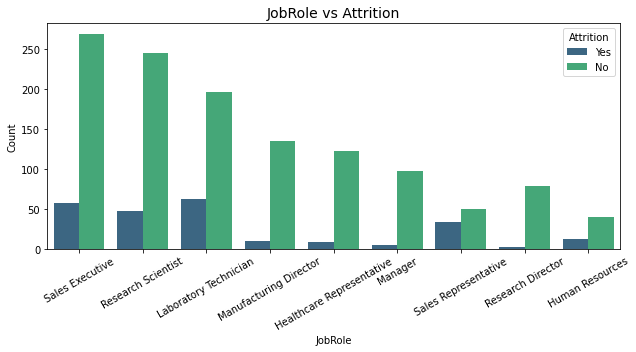

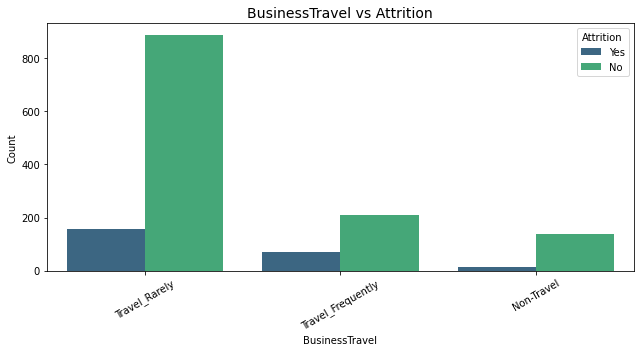

In [35]:
#Data Retrieval

# Importing required libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the dataset
try:
    data = pd.read_csv("HR-Analytics.csv")
except FileNotFoundError:
    print("Error: File not found. Please ensure 'HR-Analytics.csv' is in the directory.")
    exit()

# Visualizing the dataset
print(data.head())
print(data.info())
print(data.describe())

# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Initializing target and features in the dataset
target_col = "Attrition"
feature_cols = [col for col in data.columns if col != target_col]
print("\nTarget Column:", target_col)
print("Feature Columns:", feature_cols)

# Visualizing the target variable
print("\nVisualizing target column distribution")
sns.countplot(data=data, x=target_col)
plt.title("Attrition Distribution")
plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Count")
plt.show()

# Exploring some categorical features related to attrition
selected_features = ["Gender", "MaritalStatus", "JobRole", "BusinessTravel"]
print("\nVisualizing selected features vs. Attrition")

for feature in selected_features:
    plt.figure(figsize=(9, 5))
    sns.countplot(data=data, x=feature, hue=target_col, palette="viridis")
    plt.title(f"{feature} vs {target_col}", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.tight_layout()  # Adjust layout
    plt.show()

    
#Understanding of the data and code

#In order to work with data, we need libraries for data manipulation (Pandas), numerical operations (NumPy), and visualizations (Matplotlib and Seaborn). These are the basics for any exploratory data analysis workflow.

#Loaded the dataset "HR-Analytics.csv". This file should possess employee-related data,Both the target variable "Attrition" and others. Confirm that the file is in the directory you're working with.

#reviewing the dataset to figure out its structure.

#Investigating the first couple of rows, the dataset info, and the summary statistics to see if any problems exist.

# Additionally, missing values and duplicate rows are observed at this point.

#Visualizing the datasets such feautures vs target


In [36]:
# Data Preprocessing

print("\nPreprocessing data")

# Removing missing values
data = data.dropna()
# Dropping duplicate rows if any exist
data = data.drop_duplicates()

# Function to remove outliers from numerical columns
def remove_outliers(df, col):
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

# Apply outlier removal to all numeric columns
for col in data.select_dtypes(include=[np.number]).columns:
    data = remove_outliers(data, col)

# Encoding categorical variables using one-hot encoding
categorical_cols = data.select_dtypes(include=["object"]).columns
print("\nCategorical Columns to Encode:", categorical_cols)
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Adding new features based on existing ones
data["Tenure"] = data["YearsAtCompany"] - data["YearsInCurrentRole"]
data["SeniorityRatio"] = data["YearsInCurrentRole"] / (data["TotalWorkingYears"] + 1)

#Understanding

#Before getting into features, it is necessary first to get an insight into the distribution of the target variable, "Attrition".

#showing a count plot which compares the balance between "Yes" and "No" via count status.

#Outliers are often indispensable in data points and can cause faulty and misleading research. 

#Plucking the outliers from numerical columns, and carrying out the method of the Interquartile Range.


Preprocessing data

Categorical Columns to Encode: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')



Generating correlation heatmap...


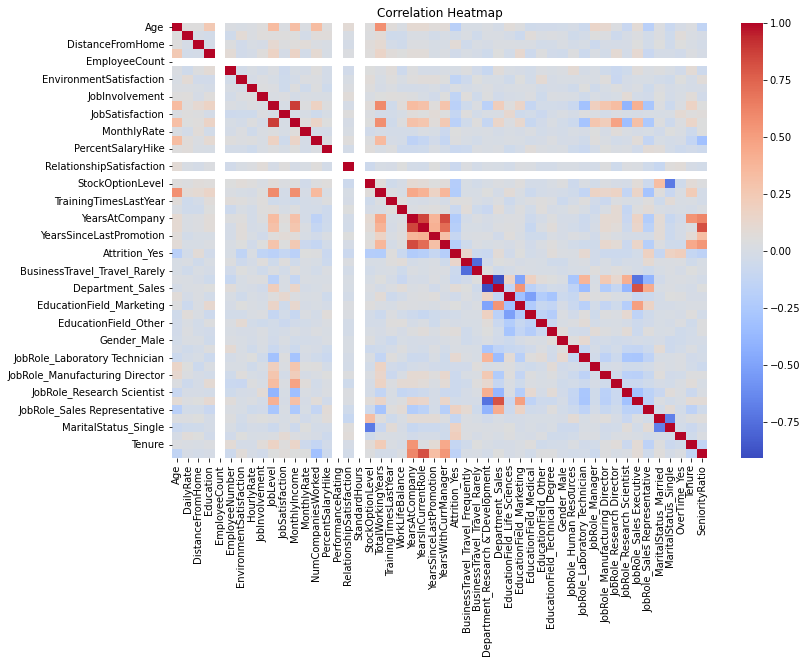


Analyzing attrition based on overtime


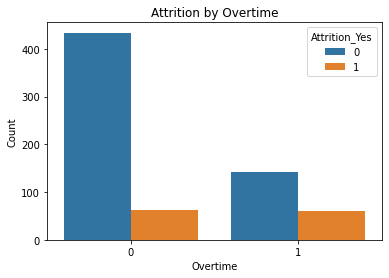

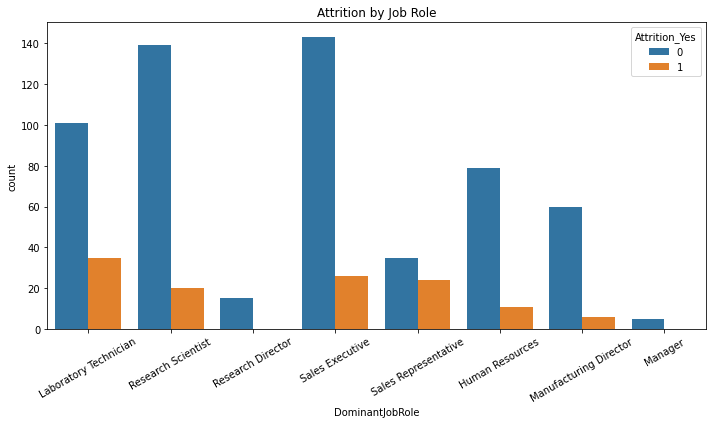

- The high turnover is noticed in the specific job roles, as well as, the ones who work beyond the hours.
- The possible way can be incentives or more flexible hours.
- Exit interviews can be channels of the output information which is more beneficial.
- Areas that are lower in engagement can be observed and help can be given where needed.


In [37]:
#Feature Engineering

# Exploratory Data Analysis: Correlation Matrix
print("\nGenerating correlation heatmap...")
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Plot attrition by overtime
if "OverTime_Yes" in data.columns:
    print("\nAnalyzing attrition based on overtime")
    sns.countplot(data=data, x="OverTime_Yes", hue="Attrition_Yes")
    plt.title("Attrition by Overtime")
    plt.xlabel("Overtime")
    plt.ylabel("Count")
    plt.show()

# Plotting job role analysis
job_roles = [col for col in data.columns if "JobRole_" in col]
if job_roles:
    data["DominantJobRole"] = data[job_roles].idxmax(axis=1).str.replace("JobRole_", "")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x="DominantJobRole", hue="Attrition_Yes")
    plt.title("Attrition by Job Role")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    
#Understanding
#Generating the correlation heatmap dentify strong relationships between variables, which can guide feature selection.

# Understanding & Recommendations
print("- The high turnover is noticed in the specific job roles, as well as, the ones who work beyond the hours.")
print("- The possible way can be incentives or more flexible hours.")
print("- Exit interviews can be channels of the output information which is more beneficial.")
print("- Areas that are lower in engagement can be observed and help can be given where needed.")